# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

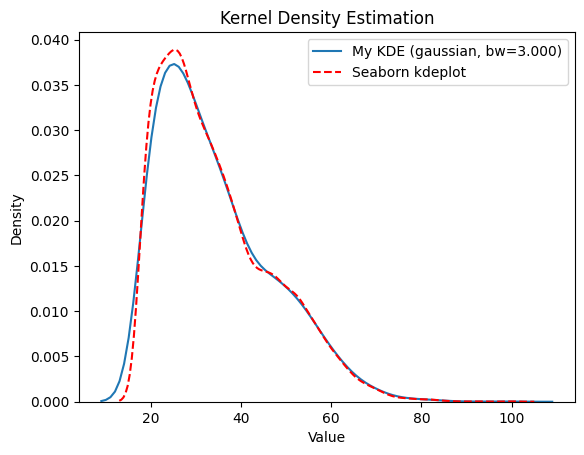

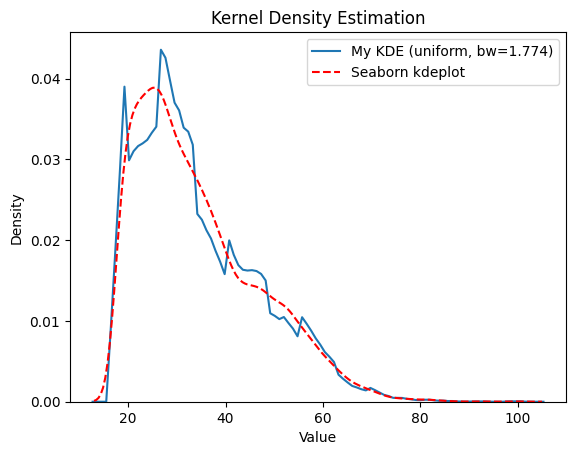

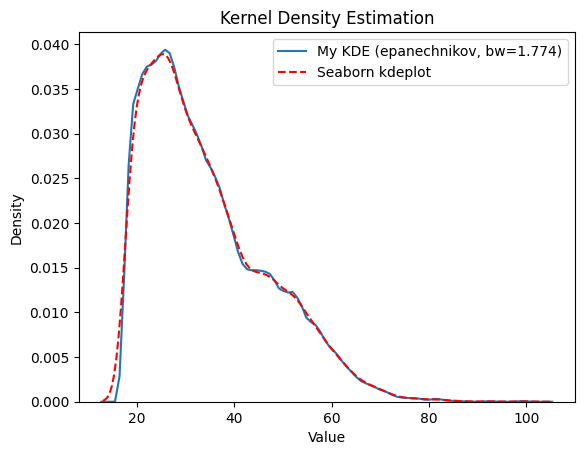

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

def my_kde(data, kernel="gaussian", bandwidth=None, gridsize=100, cut=3, plot=True):
    
    #Convert input to numpy array
    data = np.asarray(data).ravel()
    n = len(data)
    # Silverman's rule of thumb for bandwidth if not provided
    if bandwidth is None:
        std_dev = np.std(data, ddof=1)
        bandwidth = 1.06 * std_dev * n ** (-1/5)
    
    # defining kernel functions
    def gaussian_kernel(z):
        return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * z**2)
    def uniform_kernel(z):
        return 0.5 * (np.abs(z) <= 1)
    def epanechnikov_kernel(z):
        return 0.75 * (1 - z**2) * (np.abs(z) <= 1)
    kernels = {
        "gaussian": gaussian_kernel,
        "uniform": uniform_kernel,
        "epanechnikov": epanechnikov_kernel
    }
    if kernel not in kernels:
        raise ValueError(f"Unknown kernel '{kernel}'. Choose from {list(kernels.keys())}.")
    chosen_kernel = kernels[kernel]
    
    # Create grid
    xmin, xmax = data.min(), data.max()
    grid = np.linspace(xmin - cut * bandwidth, xmax + cut * bandwidth, gridsize)
    
    # Get KDE (note following from Copilot)
    #Efficient distance matrix: shape (len(grid), n)
    distances = (grid[:, None] - data[None, :]) / bandwidth
    
    # Apply kernel function to all distances
    kernel_vals = chosen_kernel(distances)
    
    #Average across all data points
    density = np.mean(kernel_vals, axis=1) / bandwidth
    
    # makes plot
    if plot:
        plt.plot(grid, density, label=f"My KDE ({kernel}, bw={bandwidth:.3f})")
        # Compare with seaborn's kdeplot for verification
        sns.kdeplot(data, label="Seaborn kdeplot", color="red", linestyle="--")
        plt.title("Kernel Density Estimation")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    return 

#Run with pretrial date:
df = pd.read_csv("./data/pretrial_data.csv")
age_data = df["age"].dropna()
my_kde(age_data, kernel="gaussian", bandwidth=3)
my_kde(age_data, kernel="uniform")
my_kde(age_data, kernel="epanechnikov")


**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
   - Dimensions: 3,798 rows or observations, 63 columns
   - Variables: Too many to list but they include "level", "aid_value", "control", "grad_100_value", "city", "state", and many more.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
   - Most 2-year schools are public (about 63%) while most 4-year schools are private not-for-profit (about 50%). There are more 4-year schools overall, and very few 2-year private not-for-profit schools.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
   - When grouped by control, it is clear that public schools have the lowest graduation rates, while private not-for-profit schools have the highest. The public school distribution is narrower and peaks higher, while both private distributions are wider and flatter. When grouped by level, 4-year schools have higher graduation rates than 2-year schools. The 4-year distribution is wider and flatter, while the 2-year distribution is narrower and peaks higher. It seems like private not-for-profit 4-year schools have the best graduation rates overall.
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
   - 2-year private not-for-profit schools appear to have the best graduation rates, followed closely by 4-year private not-for-profit schools. However, there are very few 2-year private not-for-profit schools in the data, so this may not be a fully reliable conclusion.
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
   - The shape of the graph is heavily right-skewed, due to the 4-year private not-for-profit schools having much higher average aid values than the other groups. This makes sense, as these schools often have higher tuition costs and therefore provide more aid to students.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
   - After making the grouped scatterplot, it seems that aid increases graduation rates for private not-for-profit schools, both 2-year and 4-year, and possibly for all 4-year schools. However, there is no clear relationship between aid and graduation rates for public schools or private for-profit schools.

Dimensions: (3798, 63)
Variables: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',

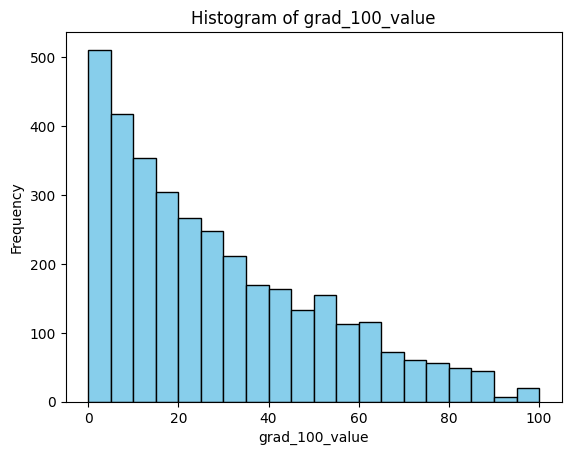

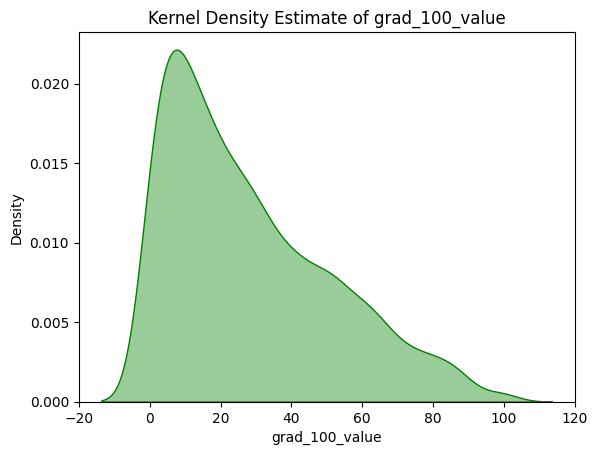

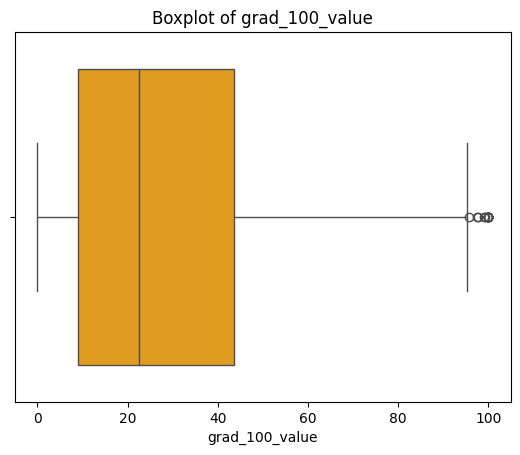

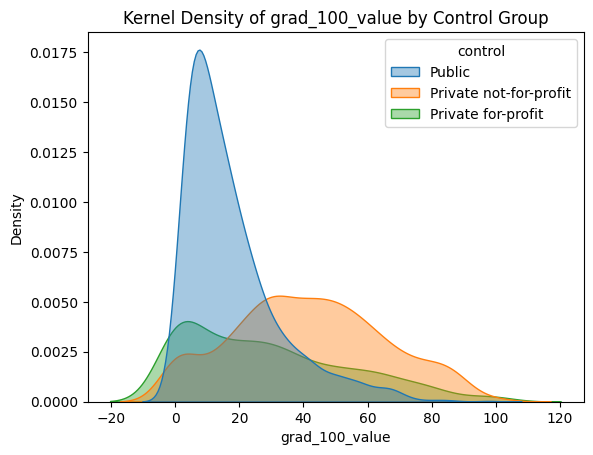

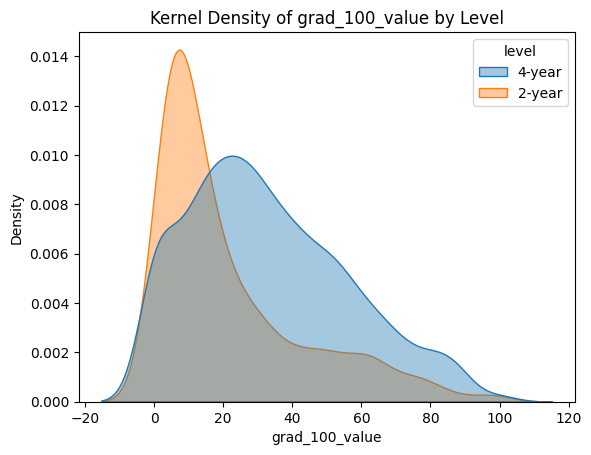

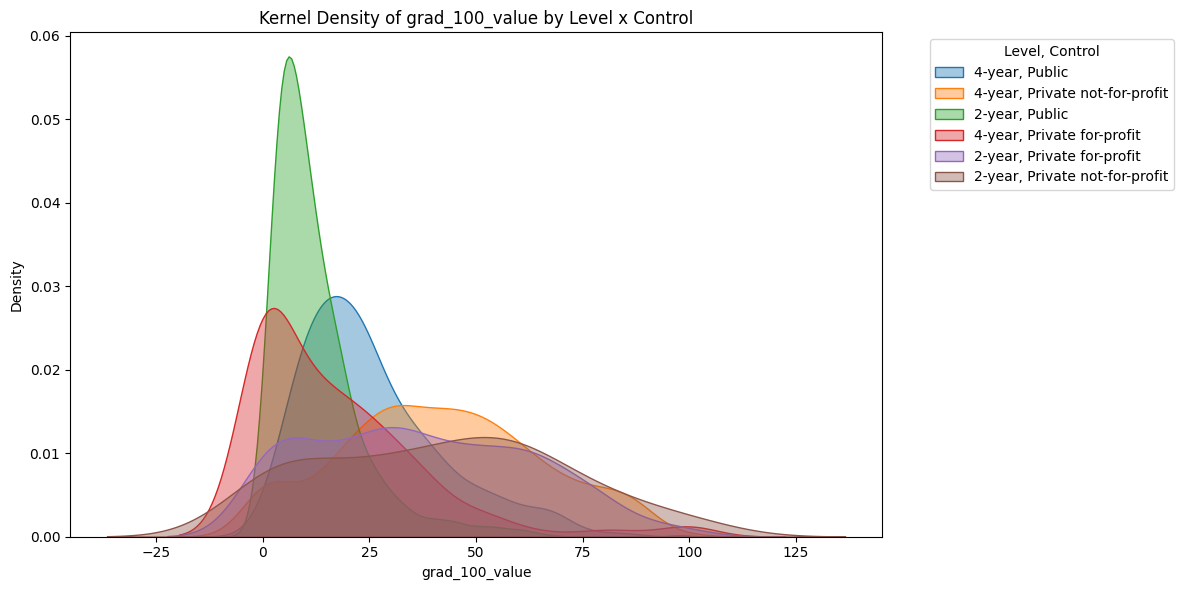

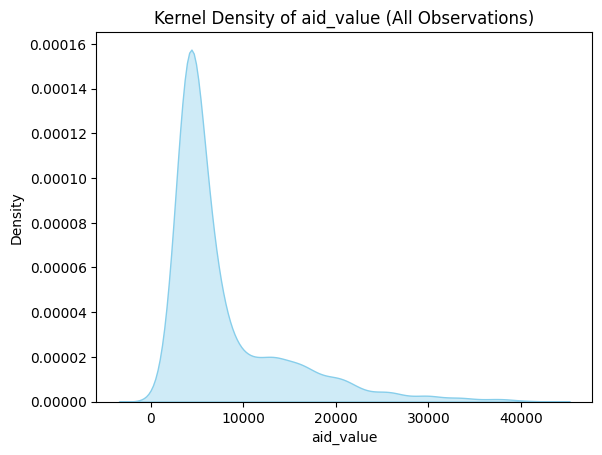

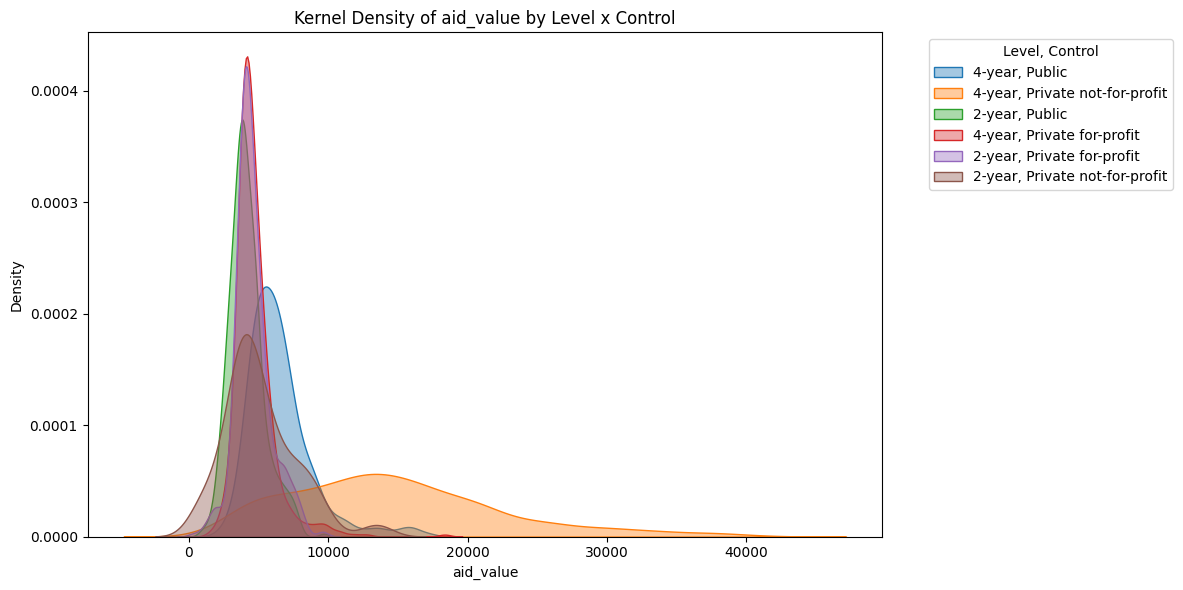

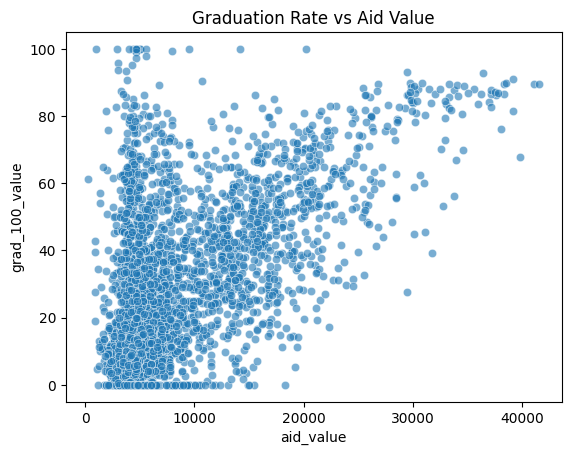

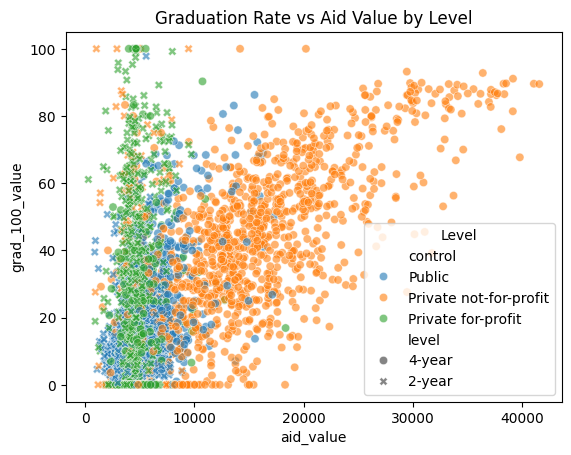

In [60]:
#Q1
college_data = pd.read_csv("./data/college_completion.csv")

#Q2
print("Dimensions:", college_data.shape)
print("Variables:", college_data.columns.tolist())
college_data.head()

#Q3
pd.crosstab(college_data['control'], college_data['level'])

#Q4
#histogram
plt.hist(college_data['grad_100_value'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of grad_100_value")
plt.xlabel("grad_100_value")
plt.ylabel("Frequency")
plt.show()
#kernel density plot
sns.kdeplot(college_data['grad_100_value'], fill=True, color='green', alpha=0.4)
plt.title("Kernel Density Estimate of grad_100_value")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
#boxplot
sns.boxplot(x=college_data['grad_100_value'], color='orange')
plt.title("Boxplot of grad_100_value")
plt.xlabel("grad_100_value")
plt.show()
#statistical description
college_data['grad_100_value'].describe()

#Q5
#grouped by control
sns.kdeplot(data=college_data, x='grad_100_value', hue='control', fill=True, alpha=0.4)
plt.title("Kernel Density of grad_100_value by Control Group")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
#grouped by level
sns.kdeplot(data=college_data, x='grad_100_value', hue='level', fill=True, alpha=0.4)
plt.title("Kernel Density of grad_100_value by Level")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
college_data.groupby('control')['grad_100_value'].describe()
college_data.groupby('level')['grad_100_value'].describe()

#Q6
college_data['levelXcontrol'] = college_data['level'].astype(str) + ', ' + college_data['control'].astype(str)
#note: used ChatGPT to rewrite because was not showing legend properly
groups = college_data['levelXcontrol'].unique()
colors = sns.color_palette("tab10", n_colors=len(groups))

plt.figure(figsize=(12, 6))
for i, group in enumerate(groups):
    subset = college_data[college_data['levelXcontrol'] == group]['grad_100_value']
    sns.kdeplot(subset, fill=True, alpha=0.4, color=colors[i], label=group)

plt.title("Kernel Density of grad_100_value by Level x Control")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.legend(title="Level, Control", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Q7
#classic:
sns.kdeplot(college_data['aid_value'], fill=True, color='skyblue', alpha=0.4)
plt.title("Kernel Density of aid_value (All Observations)")
plt.xlabel("aid_value")
plt.ylabel("Density")
plt.show()

#grouping:
college_data['levelXcontrol'] = college_data['level'].astype(str) + ', ' + college_data['control'].astype(str)

groups = college_data['levelXcontrol'].unique()
colors = sns.color_palette("tab10", n_colors=len(groups))

plt.figure(figsize=(12, 6))
for i, group in enumerate(groups):
    subset = college_data[college_data['levelXcontrol'] == group]['aid_value']
    sns.kdeplot(subset, fill=True, alpha=0.4, color=colors[i], label=group)

plt.title("Kernel Density of aid_value by Level x Control")
plt.xlabel("aid_value")
plt.ylabel("Density")
plt.legend(title="Level, Control", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#statistical description
college_data.groupby(['level', 'control'])['aid_value'].describe()

#Q8
sns.scatterplot(data=college_data, x='aid_value', y='grad_100_value', alpha=0.6)
plt.title("Graduation Rate vs Aid Value")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.show()

sns.scatterplot(data=college_data, x='aid_value', y='grad_100_value', style='level', hue='control', alpha=0.6)
plt.title("Graduation Rate vs Aid Value by Level")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.legend(title="Level")
plt.show()